<a href="https://colab.research.google.com/github/ReemAlbluwi/data-analytics/blob/main/penguins_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfـpenguins = sns.load_dataset('penguins')

In [3]:
dfـpenguins.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

### Features of the Penguin Dataset

- **Species**: Categorical - Represents the species of the penguin (Adelie, Chinstrap, Gentoo).
- **Island**: Categorical - The island where the penguin was observed (Biscoe, Dream, Torgersen).
- **Bill Length (mm)**: Numeric - The length of the penguin's bill measured in millimeters.
- **Bill Depth (mm)**: Numeric - The depth of the penguin's bill measured in millimeters.
- **Flipper Length (mm)**: Numeric - The length of the penguin's flipper measured in millimeters.
- **Body Mass (g)**: Numeric - The body mass of the penguin measured in grams.
- **Sex**: Categorical - The gender of the penguin (male or female).
- **Year**: Numeric - The year in which the penguin's information was recorded.



# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [4]:

dfـpenguins.head()
dfـpenguins.sample(5)
dfـpenguins.tail()
dfـpenguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [48]:
# Calculate count and percentage of missing values before handling them
missing_count = dfـpenguins.isnull().sum()
missing_percentage = (missing_count / len(dfـpenguins)) * 100

print("Missing Values (Count):\n", missing_count)

Missing Values (Count):
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
bill_size            0
bill_ratio           0
dtype: int64


In [46]:
print("\nMissing Values (Percentage):\n")
print(missing_percentage)


Missing Values (Percentage):

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
bill_size            0.0
bill_ratio           0.0
dtype: float64


# Handling Missing Values

## Strategy: Fill missing values in 'sex' with the mode (most frequent value)
- **Justification**: 'Sex' is a categorical variable, and the number of missing values is small. Using the mode to fill in these gaps is a practical choice as it preserves the dataset's integrity without significant bias or loss of information. This method ensures that all data points are utilized in analysis, maintaining the dataset's completeness.

In [49]:
dfـpenguins['sex'].fillna(dfـpenguins['sex'].mode()[0], inplace=True)
dfـpenguins

#The code fills missing values in the `sex` column of
#the DataFrame `df_penguins` with the most frequent value in that column.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.200001,13.700000,214.0,4925.0,Female,646.640015,3.445256
340,Gentoo,Biscoe,46.799999,14.300000,215.0,4850.0,Female,669.239990,3.272727
341,Gentoo,Biscoe,50.400002,15.700000,222.0,5750.0,Male,791.280029,3.210191
342,Gentoo,Biscoe,45.200001,14.800000,212.0,5200.0,Female,668.960022,3.054054


# Strategy: Drop Rows with Missing Values in 'bill_length_mm', 'bill_depth_mm', or 'flipper_length_mm'

## Justification:
These features are numerical and crucial for analysis. Missing values in these columns might indicate measurement errors or incomplete data collection. To maintain the accuracy and reliability of the dataset, dropping these rows is preferred. Imputing missing values could introduce bias or distortions, potentially affecting the results of any subsequent analyses. Removing the incomplete rows ensures that the dataset remains robust and the analysis is based on complete, reliable data.


In [8]:
dfـpenguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], inplace=True)
dfـpenguins



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Species and Island Diversity: There are different species of penguins (such as Adelie and Gentoo) living on various islands.
Measurements of Beak and Flippers: The data includes different measurements for beak length and depth as well as flipper length, which can be useful for analyzing differences between species or islands.
Body Mass: The data also includes information about body mass, which can be useful for analyzing the health or relative weight of different species.
Sex Distribution: There is information about the sex of the penguins, which can help in analyzing the sex distribution among different species.

In [9]:
# Check and handle duplicated rows
duplicates = dfـpenguins.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicates}")


Number of duplicated rows: 0


**The code calculates and prints the number of duplicated rows in the `df_penguins` DataFrame, which turns out to be zero after cleaning the data.**

# Strategy: Remove Duplicate Rows

## Justification:
Duplicate rows can skew the results and introduce bias in the analysis. By removing these duplicates, we ensure that each data point is unique, leading to more accurate and reliable results. This step helps maintain the integrity of the dataset and avoids redundant information.



In [10]:
dfـpenguins.drop_duplicates(inplace=True)
dfـpenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [41]:
dfـpenguins.shape

(342, 9)

In [11]:

# Calculate the percentage of data loss after cleaning
original_size = 344
cleaned_size = len(dfـpenguins)
data_loss_percentage = ((original_size - cleaned_size) / original_size) * 100

print(f"\nPercentage of data loss after cleaning: {data_loss_percentage:.2f}%")



Percentage of data loss after cleaning: 0.58%


# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [12]:
mem_usage_before = dfـpenguins.memory_usage(deep=True)

In [13]:
dfـpenguins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [14]:
# convert categotical types
dfـpenguins['species'] = dfـpenguins['species'].astype('category')
dfـpenguins['island'] = dfـpenguins['island'].astype('category')
dfـpenguins['sex'] = dfـpenguins['sex'].astype('category')

In [15]:
# convert numerical types
dfـpenguins['bill_depth_mm'] = dfـpenguins['bill_depth_mm'].astype('float32')
dfـpenguins['bill_length_mm'] = dfـpenguins['bill_length_mm'].astype('float32')
dfـpenguins['flipper_length_mm'] = dfـpenguins['flipper_length_mm'].astype('float32')
dfـpenguins['body_mass_g'] = dfـpenguins['body_mass_g'].astype('float32')

dfـpenguins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float32 
 3   bill_depth_mm      342 non-null    float32 
 4   flipper_length_mm  342 non-null    float32 
 5   body_mass_g        342 non-null    float32 
 6   sex                342 non-null    category
dtypes: category(3), float32(4)
memory usage: 9.4 KB


**Calculate** memory saved after type conversion

In [16]:
# mem_usage_after = ...?
mem_usage_after = dfـpenguins.memory_usage(deep=True)


In [17]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 66 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [18]:
# Check unique values in categorical columns
for col in dfـpenguins.select_dtypes(include=['category']):
  print(f"Unique values in {col}: {dfـpenguins[col].unique()}")

# Check frequency of values in categorical columns
for col in dfـpenguins.select_dtypes(include=['category']):
  print(f"\nValue counts in {col}:\n{dfـpenguins[col].value_counts()}")


Unique values in species: ['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
Unique values in island: ['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
Unique values in sex: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Value counts in species:
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Value counts in island:
island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

Value counts in sex:
sex
Male      177
Female    165
Name: count, dtype: int64


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [42]:
# Separate numerical and categorical features
df_num = dfـpenguins.select_dtypes(include=['number'])
df_cat = dfـpenguins.select_dtypes(include=['category'])

In [43]:
print("Statistical Information for Numerical Features:\n")
df_num.describe().T

Statistical Information for Numerical Features:



,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921932,5.459584,32.099998,39.225000,44.450001,48.500000,59.599998
bill_depth_mm,342.0,17.151171,1.974793,13.100000,15.600000,17.299999,18.700001,21.500000
flipper_length_mm,342.0,200.915207,14.061714,172.000000,190.000000,197.000000,213.000000,231.000000
body_mass_g,342.0,4201.754395,801.954529,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
bill_size,342.0,750.785645,115.421631,497.549988,667.690033,730.824982,807.155014,1127.359985
bill_ratio,342.0,2.605649,0.497375,1.639810,2.160344,2.575067,3.098777,3.612676


In [44]:
print("\nStatistical Information for Categorical Features:\n")
df_cat.describe().T


Statistical Information for Categorical Features:



,count,unique,top,freq
species,342,3,Adelie,151
island,342,3,Biscoe,167
sex,342,2,Male,177


In [19]:
# Separate numerical and categorical features
df_num = dfـpenguins.select_dtypes(include=['number'])
df_cat = dfـpenguins.select_dtypes(include=['category'])

print("Statistical Information for Numerical Features:\n", df_num.describe().T)

print("\nStatistical Information for Categorical Features:\n", df_cat.describe().T)


Statistical Information for Numerical Features:
                    count         mean         std          min       25%  \
bill_length_mm     342.0    43.921932    5.459584    32.099998    39.225   
bill_depth_mm      342.0    17.151171    1.974793    13.100000    15.600   
flipper_length_mm  342.0   200.915207   14.061714   172.000000   190.000   
body_mass_g        342.0  4201.754395  801.954529  2700.000000  3550.000   

                           50%          75%          max  
bill_length_mm       44.450001    48.500000    59.599998  
bill_depth_mm        17.299999    18.700001    21.500000  
flipper_length_mm   197.000000   213.000000   231.000000  
body_mass_g        4050.000000  4750.000000  6300.000000  

Statistical Information for Categorical Features:
         count unique     top freq
species   342      3  Adelie  151
island    342      3  Biscoe  167
sex       342      2    Male  177


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

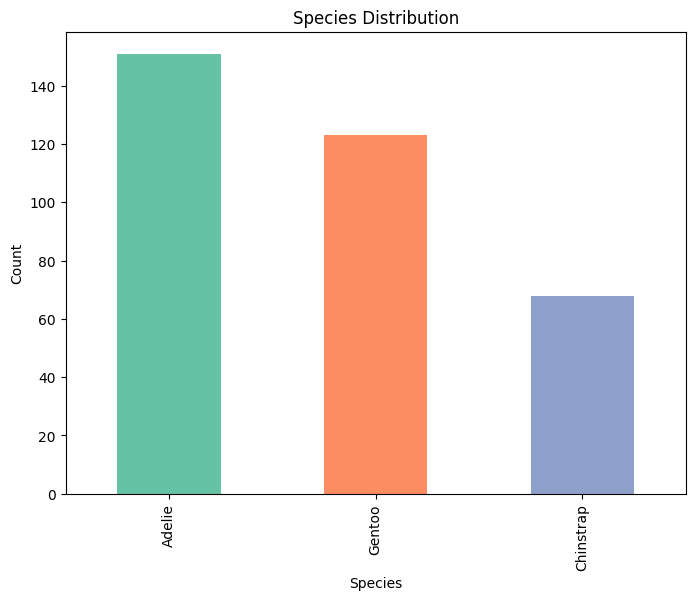

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
plt.figure(figsize=(8, 6))
dfـpenguins['species'].value_counts().plot(kind='bar', color=sns.color_palette("Set2"))
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



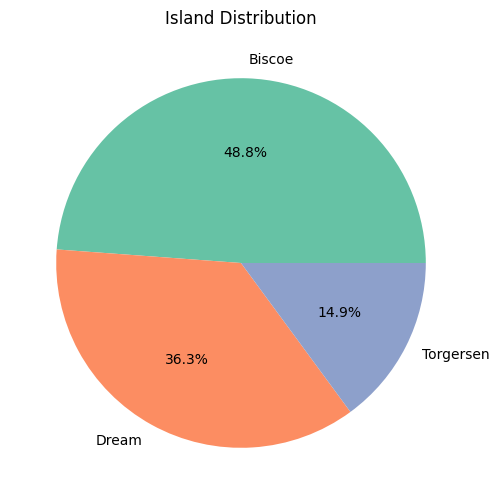

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
plt.figure(figsize=(8, 6))
dfـpenguins['island'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Island Distribution')
plt.ylabel('')
plt.show()


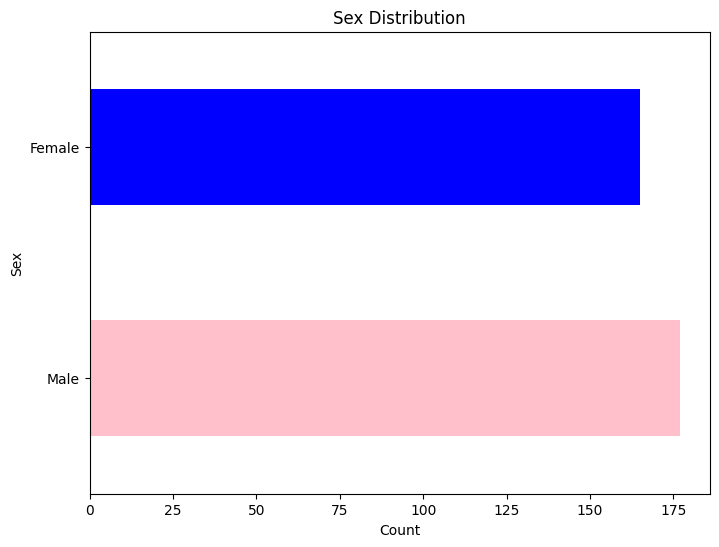

In [22]:
colors = ['pink', 'blue']
plt.figure(figsize=(8, 6))
dfـpenguins['sex'].value_counts().plot(kind='barh', color=colors)
plt.title('Sex Distribution')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()


Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

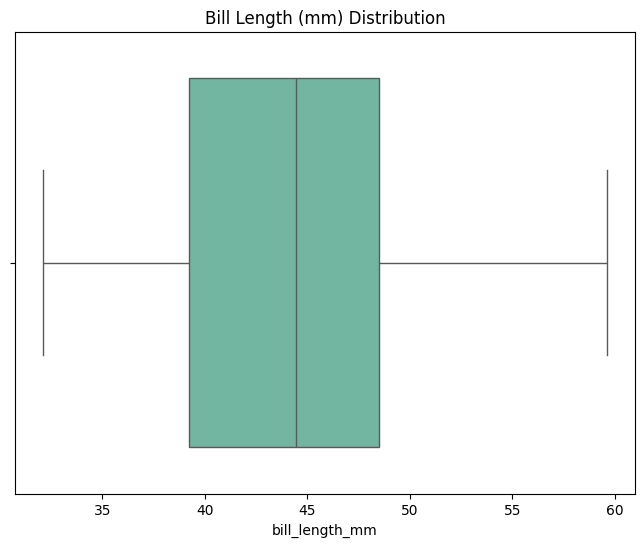

In [23]:
# Boxplot for bill_length_mm

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_num['bill_length_mm'], )
plt.title('Bill Length (mm) Distribution')
plt.show()


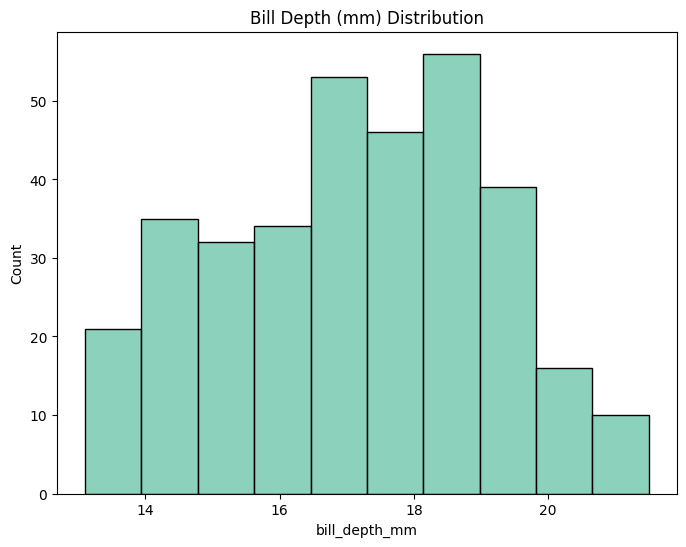

In [24]:
# Histogram for bill_depth_mm
plt.figure(figsize=(8, 6))
sns.histplot(df_num['bill_depth_mm'])
plt.title('Bill Depth (mm) Distribution')
plt.show()


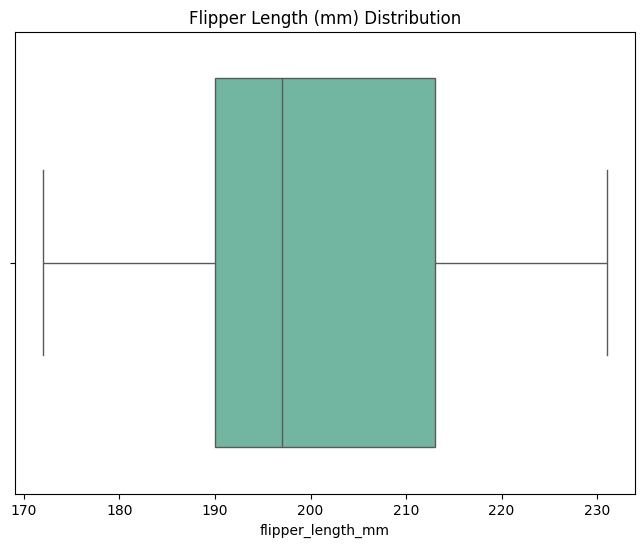

In [25]:
# Boxplot for flipper_length_mm
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_num['flipper_length_mm'])
plt.title('Flipper Length (mm) Distribution')
plt.show()

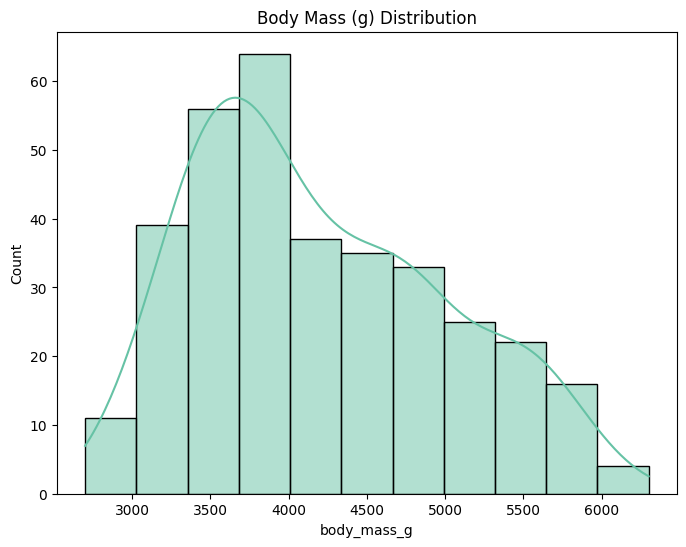

In [26]:
# Histogram for body_mass_g
plt.figure(figsize=(8, 6))
sns.histplot(df_num['body_mass_g'], kde=True)
plt.title('Body Mass (g) Distribution')
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

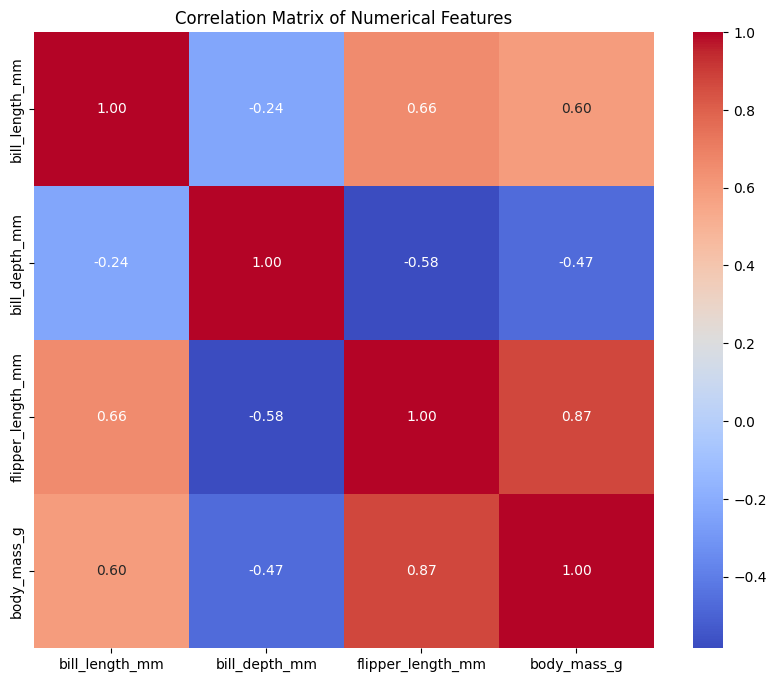

In [27]:

corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Write down your observations based on the correlation heatmap.

Observations:


- **Strong Positive Correlations**: Values close to +1 indicate a strong positive relationship. For example, if `bill_length_mm` and `flipper_length_mm` are strongly correlated, an increase in one suggests an increase in the other.

- **Strong Negative Correlations**: Values close to -1 indicate a strong negative relationship. For instance, if `bill_depth_mm` and `body_mass_g` are strongly negatively correlated, an increase in one may lead to a decrease in the other.

- **Weak or No Correlations**: Values near 0 suggest a weak or no linear relationship, meaning changes in one variable don't predict changes in the other.

- **Symmetry**: The heatmap is symmetric around the diagonal, so the correlation between `A` and `B` is the same as between `B` and `A`.

- **Diagonal Values**: The diagonal values are 1, indicating each variable perfectly correlates with itself.

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [28]:
dfـpenguins['bill_size'] = dfـpenguins['bill_length_mm'] * dfـpenguins['bill_depth_mm']
dfـpenguins['bill_ratio'] = dfـpenguins['bill_length_mm'] / dfـpenguins['bill_depth_mm']
dfـpenguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

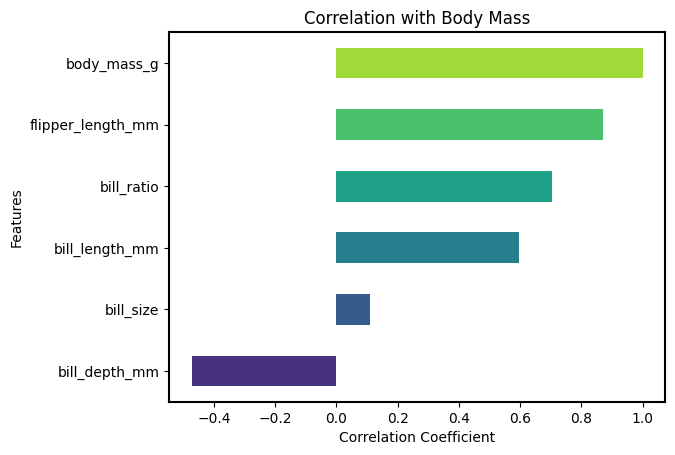

In [40]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
numeric_df = dfـpenguins.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
corr = numeric_df.corr()
colors = sns.color_palette("viridis", len(corr['body_mass_g']))
ax = corr['body_mass_g'].sort_values().plot.barh(color=colors)
plt.title('Correlation with Body Mass')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.show()

**We created a new column called `bill_ratio` that calculates the ratio of the beak length to its depth, showing the ratio between `bill_length_mm` and `bill_depth_mm`. It turns out that the new column `bill_ratio` has higher values compared to `bill_size`, `bill_length_mm`, and `bill_depth_mm`.**